In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np
from PIL import Image

In [6]:
def read_image(path):
    im = Image.open(path)
    width = 600
    height = int(im.size[1]*float(width/float(im.size[0])))
#     im = np.array(im.resize((width, height)))[:,:,:3]
    im = im.resize((width, height))
    return im

In [266]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np
from os import listdir
from os import path
from PIL import Image
from PIL import Image, ImageChops
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
mypath = r'../Images'  # remove the trailing '\'
i = 0
for dir_entry in listdir(mypath):
    i += 1
    dir_entry_path = path.join(mypath, dir_entry)
    if path.isfile(dir_entry_path):
        im = read_image(dir_entry_path)
    else:
        continue
#     if (i<3):
#         continue
    im = np.array(im)[:,:,:4]
    sq = func0(im)
    res = im[min(sq[0][1],sq[2][1]):max(sq[0][1],sq[2][1]),min(sq[0][0],sq[2][0]):max(sq[0][0],sq[2][0])]
#     print(sq[0][1], sq[2][1], sq[0][0], sq[2][0], im.shape)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    res = ffff(res)
    res = cutting(res)
    res = delmead(res)
    grim = np.zeros((im.shape[0], im.shape[Ы1]))
    grim[min(sq[0][1],sq[2][1]):max(sq[0][1],sq[2][1]),min(sq[0][0],sq[2][0]):max(sq[0][0],sq[2][0])] = res
    grim = remove_small(grim, gray)
#     res = countsomefeat(grim, im[:,:,:3])
#     res = merging(gray, grim)
    import scipy
#     print(grim.shape, res.shape, im.shape)
    scipy.misc.imsave(mypath+"/binim/"+str(i)+".jpg", np.append(grim*255
                                                                , gray, axis = 1))

#     scipy.misc.imsave(mypath+"/binim/"+str(i)+".jpg", np.append(res*255
#                                                                 , im[:,:,:3], axis = 1))
# 
#     scipy.misc.imsave(mypath+"/binim/"+str(i)+".jpg", np.append(res*255
#                                                                 , gray[:res.shape[0], :res.shape[1]], axis = 1))
#     break

[False False  True  True False False  True]
[False  True  True  True]
[False  True  True  True  True  True  True]
[False  True  True  True False  True  True False False]
[0 1 1 1 0]
[False  True  True  True  True False  True]
[0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1]
[0 0 0 1 0 1 0 0 0 1 0 1 0]
[0 1 1 1 0 0 1 1 0]
[0 0 0 0 1 1 1 1 1 1 1 1 1 0]
[False False False  True  True]
[False  True  True  True False  True  True  True  True  True]
[0 1 0 0 1 0 0 0 1 1 1 0]
[0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
[False  True  True  True  True]
[0 1 1 1 1 0]
[0 0 1 1 0 0 0 0 0 1]
[False  True  True  True  True  True]
[0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0]
[False False  True False  True  True  True]
[False False  True  True  True  True  True False False  True False  True]
[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[False  True  True  True  True  True  True  True]
[0 1 0 1 1 1 1]
[0 0 0 0 1 1 1 1 1]
[False  True  True  True]
[False False False  True 

/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
im = read_image("../Images/15.tif")
image = np.array(im)#np.array(trim(im))[:,:,:3]#
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# gray = cv2.GaussianBlur(gray,(9,9),20)
# gray = cv2.dilate(edged, kernel, iterations = 2)
# selem = morphology.disk(15)
# gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel, iterations = 3)
gray = cv2.medianBlur(gray, 3)
edged = cv2.Canny(gray, 50, 100, apertureSize=3)
# laplacian = cv2.Laplacian(gray,cv2.CV_64F)
# sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
# sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)
np.where(edged[1].astype(bool)==True)#[0][0]
# plt.imshow(edged, cmap = 'gray')
np.where(edged[10].astype(bool)==True)

In [207]:
import cv2
from skimage import morphology, filters
def ffff(image):
    for im in cv2.split(image):
        im = ((im - im.min())/(im.max()-im.min())).astype(np.uint8)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#     gray = cv2.GaussianBlur(gray,(3,3),2)
    gray = cv2.medianBlur(gray, 3)
#     plt.imshow(gray)
#     print(gray.min(), gray.max())
#     print(gray)
    edged = cv2.Canny(gray, 200, 200, apertureSize=3)
#     print(edged.min(), edged.max(), edged.sum()/(255*edged.shape[0]*edged.shape[1]))
    if (edged.sum()/(255*edged.shape[0]*edged.shape[1])<  0.001):
        edged = cv2.Canny(gray, 50, 100, apertureSize=3)
    edged2 = edged.copy()
    const = 20
    borders = edged.copy()
    borders[const:-const, const:-const] = 0
    edged[-const:edged.shape[0]] = 0
    edged[:, -const:edged.shape[1]] = 0
    edged[:const]=0
    edged[:,:const]=0
    # edged = cv2.medianBlur(edged, 3)
    kernel = morphology.rectangle(4, 5)#morphology.disk(2)
    
    from scipy import ndimage
    edged = RLSA2(edged, 28)#18
    opened = morphology.remove_small_objects(edged, min_size=500, connectivity=4, in_place=False)
    opened = cv2.dilate(opened, kernel, iterations = 2)
    borders = cv2.dilate(borders, kernel, iterations = 2)
    opened = RLSA2(opened, 30)#18
    opened = RLSA(opened, 6)#18
    
    return opened+borders#img_with_top_square#opened

In [264]:
def remove_small(binim, gray):
    label_im, nb_labels = ndimage.measurements.label(binim.astype(int))
    small = np.array(())
    example = read_image("../Images/binim/000.tif")
    example = cv2.cvtColor(np.array(example), cv2.COLOR_BGR2GRAY)
    imgrad = np.arctan2(filters.sobel_h(example), filters.sobel_v(example))
    edged = cv2.Canny(example, 200, 200, apertureSize=3)
    feat = np.array(())
    feat = np.append(feat, counthog(imgrad))
    feat = np.append(feat, edged.sum()/(example.shape[0]*example.shape[1]))
    feat = np.append(feat,0)
    imgrad = np.arctan2(filters.sobel_h(grim), filters.sobel_v(grim))
    edged = cv2.Canny(gray, 200, 200, apertureSize=3)
    for i in range(nb_labels+1):
        sq = np.sum(label_im == i)
        wh = np.where(label_im == i)
        x0 = wh[0].min()
        y0 = wh[1].min()
        x1 = wh[0].max()
        y1 = wh[1].max()
        if (sq < 3000):
            small = np.append(small, i)
#             feat = np.append(feat, np.sum(edged[label_im ==i])/sq)
            feat = np.append(feat, counthog(imgrad[label_im ==i]))
            feat = np.append(feat, edged[label_im ==i].sum()/sq)
            feat = np.append(feat, sq/((x1-x0)*(y1-y0)))
    feats_shape = 8+1+1
    feat = feat.reshape(-1, feats_shape)
    if (feat.shape[0] < 2):
        return binim
    clast = KMeans(2).fit_predict(feat)
    featmean = feat.mean()
    if (clast[0]):#clast.sum() > clast.size/2):
        clast = np.logical_not(clast)
    print(clast)
    clast = clast[1:]
    for i in small[clast == 0]:
        binim[label_im == i] = 0.2
    for i in small[clast != 0]:
        binim[label_im == i] = 0.7
    return binim

In [209]:
def delmead(opened):
    label_im, nb_labels = ndimage.measurements.label(opened.astype(int))
    aspect_ratio=np.array(())
    
   
    from sklearn.cluster import KMeans
    for l in range(nb_labels+1):
        sq = np.sum(l == label_im)
        aspect_ratio = np.append(aspect_ratio, np.max(np.sum(l == label_im, axis = 0))/np.max(np.sum(l == label_im, axis = 1)))
#         print(aspect_ratio[-1])
        if ((aspect_ratio[-1]<0.1 or aspect_ratio[-1]>4)):#sq > 1200 and 
            opened[l == label_im] = 0
# #     print(aspect_ratio.mean(), aspect_ratio.max(), aspect_ratio.min())
# # opened = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel, iterations = 3)
#     filt = cv2.medianBlur(opened+borders, 7)
    filt = opened
#     # thresh = filters.threshold_otsu(filt)
    rast = np.logical_not(morphology.remove_small_objects(np.logical_not(filt), min_size=500, connectivity=4, in_place=False))
    rast = RLSA2(rast, 18)#18
#     rast = RLSA(rast, 7)
    rast = cv2.medianBlur(rast.astype(np.uint8), 3)
    rast = np.logical_not(morphology.remove_small_objects(np.logical_not(rast), min_size=5000, connectivity=4, in_place=False))
#     rast = cv2.medianBlur(rast.astype(np.uint8), 7)
    
#     rast = cv2.Sobel(rast.astype(np.uint8),cv2.CV_64F,1,0,ksize=5)#sobelx
#     rast = cv2.Sobel(rast.astype(np.uint8),cv2.CV_64F,0,1,ksize=5)#sobely
#     for i in indexes[squares<1500]:
#         gray[label_im==i].mean()
#     from sklearn.cluster import KMeans
#     binim = KMeans(2).fit_predict(feats)
#     for i in indexes[squares<2000]:#range(nb_labels):
#         print("b",binim[i])
# #         if (binim[i] == 1):
#         rast[label_im==i] = 0#binim[i]
#             print(i)
    # const = 5
    # rast[-const:edged.shape[0]] = 0
    # rast[:, -const:edged.shape[1]] = 0
    # rast[:const]=0
    # rast[:,:const]=0
    # binary = filt > thresh
    # cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) 
    # bina = filters.threshold_adaptive(filt, 50, 'gaussian', 5)
    
#     edges = morphology.binary_dilation(rast, selem = morphology.disk(15)) - rast
#     outim = image.copy()
#     outim[edges] = np.array((0, 255, 0))
#     height = image.shape[0]
#     width = image.shape[1]

#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) # matrix of ones

#     dilated = cv2.dilate(src = gray, kernel = kernel, anchor = (-1,-1))
#     blured = cv2.medianBlur(dilated, 7)
#     small = cv2.pyrDown(image, dstsize = (width // 2, height // 2))
#     oversized = cv2.pyrUp(small, dstsize = (width, height))

#     plt.imshow(rast, cmap = 'gray')#(filt - filt.min())/(filt.max() - filt.min()), cmap = 'gray')
#     lines = cv2.HoughLinesP(edged, 1, np.pi/180, 50, 50, 10 );
#     img_with_top_square = img_copy.copy()
#     cv2.drawContours(img_with_top_square, [sorted_squares[0]], -1, (0,255,60), 3)
    return rast

In [80]:
def cutting(gray):
    normed = (gray-gray.min())/(gray.max()-gray.min())
    hor = np.sum(normed, axis = 0)
    hor2 = np.append(hor[1:], 0)
    ver = np.sum(normed, axis = 1)
    hors = np.argsort(np.abs(hor-hor2))
    vers = np.argsort(ver)
    normed[:,hors[-7:]] = 0
#     i=0
#     while (ver[vers][i]==0):
#         i+=1
#     normed[vers[i:i+2]] = 0
    return normed

In [211]:
from scipy import ndimage
def merging(gray, binim):
    label_im, nb_labels = ndimage.measurements.label(binim.astype(int))
    feats = extract_features(np.arange(nb_labels+1), segments_slic = label_im, grim = gray)
    from sklearn.cluster import DBSCAN
#     cl = DBSCAN(eps=0.5, min_samples=5, metric='euclidean', algorithm='auto', leaf_size=30, p=None, random_state=None)
#     print(feats.shape)
    clast = KMeans(nb_labels-1).fit_predict(feats) +1
#     clast = cl.fit_predict(feats)
    print(clast)
    for i in range(nb_labels+1):
        label_im[label_im == i] = clast[i]
    """convex_hull"""
#     from skimage.morphology import convex_hull_image
#     for i in set(clast):
#         imi = np.zeros(grim.shape)
#         imi[label_im == i] = grim[label_im == i]
#         imi = imi.astype(bool)
#         chull = convex_hull_image(imi)
#         plt.imshow(chull)
#         del imi
#         break
    from skimage.color import label2rgb
    image_label_overlay = label2rgb(label_im, image=gray)

    return image_label_overlay#label_im

In [125]:
def countsomefeat(gray, im):
    tmp = cv2.findContours(gray.astype(np.uint8), mode = cv2.RETR_LIST, method = cv2.CHAIN_APPROX_SIMPLE)
    hierarchy = tmp[0]
    contours = tmp[1]
    # how are the contours sorted? outwards to inwards? would be interesting to do a PVE
    # sort of thing where the contours within a contour (and maybe see an elbow plot of some sort)
    squares = list()
    for cnt in contours:
        cnt_len = cv2.arcLength(cnt, True)
        cnt = cv2.approxPolyDP(cnt, 0.02*cnt_len, True)
        cnt = cnt.reshape(-1, 2)
        squares.append(cnt)
        
    img_with_top_square = im.copy()
#     cv2.drawContours(img_with_top_square, squares, -1, (0,255,60), 3)

    height = im.shape[0]
    width = im.shape[1]
    
    k = list()
    label_im=np.zeros(gray.shape)
    j=0
    for square in squares:        
        formatted = np.array([[s] for s in square], np.int32)
        x,y,wid,hei = cv2.boundingRect(formatted)
        
        label_im[y:y+hei, x:x+wid] = j
        
        max_distance_from_center = np.sqrt(((width / 2))**2 + ((height / 2))**2)
        distance_from_center = np.sqrt(((x + wid / 2) - (width / 2))**2 + ((y + hei / 2) - (height / 2))**2)
        height_above_horizontal = (height / 2) - y if y + hei > height / 2 else hei
        width_left_vertical = (width / 2) - x if x + wid > width / 2 else wid
        horizontal_score = abs(float(height_above_horizontal) / hei - 0.5) * 2
        vertical_score = abs(float(width_left_vertical) / wid - 0.5) * 2
        sq = cv2.contourArea(formatted)#cnt
        cnt_len = cv2.arcLength(formatted, True)
        bounding_box = np.array([[[x,y]], [[x,y+hei]], [[x+wid,y+hei]], [[x+wid,y]]], dtype = np.int32)
#         cv2.drawContours(img_with_top_square, [bounding_box], -1, (0,255,60), 3)
        # every separate line in this addition has a max of 1
        k.append(distance_from_center / max_distance_from_center +
          cv2.contourArea(formatted) / cv2.contourArea(bounding_box) +
          cv2.contourArea(formatted) / (width * height) +
          horizontal_score +
          vertical_score)
        j+=1
    from sklearn.cluster import AffinityPropagation
    cl = AffinityPropagation()
#         MeanShift
#     cl = DBSCAN(eps=0.5, min_samples=5, metric='euclidean', algorithm='auto', leaf_size=30, p=None, random_state=None)
#     cl = KMeans(len(squares)-1)
    feats = np.array(k).reshape(-1,1)
    clast = cl.fit_predict(feats) + 1
    print(clast)
    for i in range(j):
        label_im[label_im == i] = clast[i]
    from skimage.color import label2rgb
    img_with_top_square = label2rgb(label_im, image=img_with_top_square)

    return img_with_top_square

In [ ]:
#     label_im, nb_labels = ndimage.measurements.label(rast.astype(int))
#     squares=np.array(())
#     feats = np.zeros((nb_labels,9))
#     from skimage import filters
#     from skimage import feature
#     def counthog(imgrad):
#         return np.histogram(imgrad, bins = 8, density = True)[0]
#     imgrad = np.arctan2(filters.sobel_h(gray), filters.sobel_v(gray))
#     meangray = np.zeros((nb_labels,2))
#     for l in range(nb_labels):
#         squares = np.append(squares, np.sum(l == label_im))
# #         print(squares[-1])
#         x = np.where(label_im==l)[0]
#         y = np.where(label_im==l)[1]
#         meangray[l] = np.array((x.mean(), y.mean()))
#         wh = np.where(label_im==l)
#         feats[l,0] = np.sum(edged[wh])/wh[0].size
#         feats[l,1:9] = counthog(imgrad[wh])#np.append(feats, gray[label_im==l].mean()) #(rast[label_im==l] ==1).sum()/(rast[label_im==l] ==0).sum())
#     indexes = np.arange(nb_labels)

In [8]:
import cv2
# im = read_image("../Images/30.jpg")
# image = np.array(im)

# convert the image to grayscale, blur it, and find edges
# in the image
def func(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(gray, 30, 200)
    cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
    screenCnt = None
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    #     cv2.drawContours(image, c, -1, (0, 255, 0), 3)
        # if our approximated contour has four points, then
        # we can assume that we have found our screen
    #     if len(approx) == 4:
    #         screenCnt = approx
    #         break
    # x,y,w,h = cv2.boundingRect(cnts[0])
    # peri = cv2.arcLength(cnts[0], True)
    # approx = cv2.approxPolyDP(cnts[0], 0.02 * peri, True)
    # image = cv2.rectangle(image,tuple(approx[0, 0]), tuple(approx[1,0]),(0,255,0),2)
        cv2.drawContours(image, [c], -1, (0, 255, 0), 3)
    return image
# print(1
# plt.imshow(image[y:y+h,x:x+w])
# cv2.imshow("Game Boy Screen", image)

In [6]:
"""bad for images without frames or with big frames"""
from PIL import Image, ImageChops

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

In [12]:
Image.fromarray(im).save("name.jpg")

Slic number of segments: 108


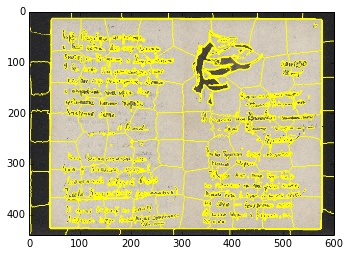

In [267]:
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

from skimage.segmentation import felzenszwalb, slic, quickshift
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = np.array(im)[:,:,:3]#img_as_float(astronaut()[::2, ::2])
# segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=100, compactness=10, sigma=1)
# segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
print("Slic number of segments: %d" % len(np.unique(segments_slic)))
plt.imshow(mark_boundaries(img, segments_slic))

In [268]:
grim = img.dot(W)

In [269]:
supergrim = np.empty((segments_slic.max()))
for i in range(segments_slic.max()):
    supergrim[i] = grim[segments_slic == i].mean()
from sklearn.cluster import KMeans
labels = KMeans(3).fit_predict(supergrim.reshape((-1, 1)))
back = 1if (supergrim[0] < 100 and labels[0] == 0 or
    supergrim[0] > 100 and labels[0] == 1):
    back = 0
forwardsupergrim = np.array(())
for i in range(supergrim.size):
    if (back != labels[i]):
        grim[segments_slic == i] = 255   
        supergrim[i] = 255
    else:        forwardsupergrim = np.append(forwardsupergrim, i)

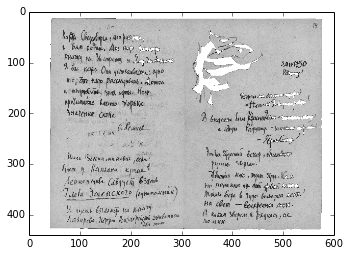

In [270]:
plt.imshow(img.dot(W)-grim, cmap = 'gray')

In [206]:
forwardsupergrim.shape

(499,)

In [30]:
# from skimage.util.shape import view_as_windows
# patches1 = view_as_windows(astro, patch_shape)
# patches1 = patches1.reshape(-1, patch_shape[0] * patch_shape[1])#[::8]
from __future__ import print_function

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as nd

from skimage.util import img_as_float
# from skimage import filters
from skimage.filters import gabor_kernel

def compute_feats(image, kernels):
    feats = np.array(())#np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        print(image.shape, kernel.shape)
        filtered = nd.convolve(image, kernel, mode='wrap')
        feats = np.concatenate(feats, filtered.mean(), filtered.var())
#         feats[k, 0] = filtered.mean()
#         feats[k, 1] = filtered.var()
    return feats
# prepare filter bank kernels
kernels = []
for theta in [0, np.pi/4, np.pi/8, 3*np.pi/4]:#range(4):
#     theta = theta / 4. * np.pi
    for sigma in [1]:#(1, 3):
        for frequency in [2, 4, 8, 16, 32, 64]:#(0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency*np.sqrt(2), theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)
print(len(kernels))

24


In [9]:
"""
FIND NEIGHBOURS
"""
def findneigh(forwardsupergrim, segment_slic, d, feats_shape):
    neigh = []
    neighborhoods = np.empty((forwardsupergrim.size, feats_shape))
    for i in range(forwardsupergrim.size):
        wh = np.where(np.array(segment_slic == forwardsupergrim[i]) == True)
        segment = np.ones((np.array(segment_slic.shape)+2))*forwardsupergrim[i]
        segment[1:segment_slic.shape[0]+1, 1:segment_slic.shape[1]+1] = segment_slic
        neigh.append((set(forwardsupergrim)&set(np.concatenate(
            (segment[wh[0]-1, wh[1]-1], segment[wh[0]+1, wh[1]+1], segment[wh[0]-1, wh[1]+1], segment[wh[0]+1, wh[1]-1])))))
#         print(neigh)
#         neighborhoods[i] = feats[forwardsupergrim[i] == np.array(neigh[-1])].sum(axis = 0)/len(neigh)
#         break
    for i in range(forwardsupergrim.size):
        wh = np.where(segment_slic == forwardsupergrim[i])
        neighcur = np.array(list(neigh|list(set([neigh[j] for j in neigh[i]]))))
        neighborhoods[i] = feats[forwardsupergrim[i] == neighcur].sum(axis = 0)/neighcur.size
    return neighborhoods

In [246]:
neigh = set()
neigh.add((1,2,4,1))
neigh
# neigh|list(se((1,2,1,3)))

{(1, 2, 4, 1)}

In [10]:
def RLSA(binim, N):
#     y = np.copy(grim)
    t = np.copy(binim)
    for i in range(binim.shape[1]):
        co = np.where(binim[:,i].astype(bool)==True)[0]
        if (len(co) == 0):
            continue
        c = co[0]
        val  = binim[c, i]
        for j in range(binim.shape[0]):
            if (t[j, i] == val):
                if (j-c<=N):
                    t[c:j, i] = val
                c = j
        if (binim.shape[0]-c <= N):
            t[c:binim.shape[1], i] = 1
    return t

In [11]:
def RLSA2(binim, N):
#     y = np.copy(grim)
#     z = np.histogram(binim)[0]
    t = np.copy(binim)
    for i in range(binim.shape[0]):
        co = np.where(binim[i].astype(bool)==True)[0]
        if (len(co) == 0):
            continue
        c = co[0]
        val  = binim[i, c]
        for j in range(c, binim.shape[1]):
            if (t[i, j] == val):
                if (j-c<=N):
                    t[i, c:j] = val
                c = j
#         if (binim.shape[1]-c <= N):
#             t[i, c:binim.shape[0]] = 1
    return t

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np
from os import listdir
from os import path
from PIL import Image
from PIL import Image, ImageChops
def RLSA(binim, N):
#     y = np.copy(grim)
    t = np.copy(binim)
    for i in range(binim.shape[1]):
        c = 1
        for j in range(binim.shape[0]):
            if (t[j, i] == 1):
                if (j-c<=N):
                    t[c:j, i] = 1
                c = j
        if (binim.shape[0]-c <= N):
            t[c:binim.shape[1], i] = 1
    return t
def RLSA2(binim, N):
#     y = np.copy(grim)
#     z = np.histogram(binim)[0]
    t = np.copy(binim)
    for i in range(binim.shape[0]):
        c = 1
        for j in range(binim.shape[1]):
            if (t[i, j] == 1):
                if (j-c<=N):
                    t[i, c:j] = 1
                c = j
        if (binim.shape[1]-c <= N):
            t[i, c:binim.shape[0]] = 1
    return t
def read_image(path):
    im = Image.open(path)
    width = 600
    height = int(im.size[1]*float(width/float(im.size[0])))
    im = im.resize((width, height))
    return im
def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)
mypath = r'../Images'  # remove the trailing '\'
i = 0
for dir_entry in listdir(mypath):
    i += 1
    dir_entry_path = path.join(mypath, dir_entry)
    if path.isfile(dir_entry_path):
        im = read_image(dir_entry_path)
    else:
        continue
    im = np.array(im)[:,:,:3]#np.array(trim(im))[:,:,:3]
    W = np.array([0.2126, 0.7152, 0.0722])#[0.299, 0.587, 0.114])
    grim = im.dot(W)
#     grim = filters.median(grim/255.0, selem = morphology.disk(3))*255.0
    
    from sklearn.cluster import KMeans
    binim = KMeans(2).fit_predict(grim.reshape((-1, 1))).reshape((grim.shape))
    num = (binim==1).sum()
    num2 = binim.shape[0]*binim.shape[1]-num
    if (num > num2):
        binim = np.logical_not(binim)
    t = RLSA2(binim, 20)
#     t = RLSA(t, 15)
    from skimage import morphology
    rast1 = np.logical_not(morphology.remove_small_objects(np.logical_not(t), min_size=500, connectivity=4, in_place=False))
    from skimage import filters
#     rast1 = filters.median(rast1, selem = morphology.disk(5))
    # rast1 = skimage.morphology.binary_dilation(rast1, selem = skimage.morphology.disk(15))
#     rast1 = morphology.binary_opening(rast1, selem = morphology.rectangle(9, 3)) #erosion
#     plt.imshow(rast1, cmap = 'gray')
#     p = np.concatenate((rast1, rast1, rast1))
    import scipy
    scipy.misc.imsave(mypath+"/binim/"+str(i)+".bmp", np.append(binim, rast1, axis = 0))
#     Image.fromarray(np.uint8(t)*255, mode = '1').save(mypath+"/binim/"+str(i)+".bmp", mode='1')

In [ ]:
import cv2
im = read_image("../Images/23.tif")
image = np.array(im)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
plt.imshow(gray, cmap = 'gray')
edged = cv2.Canny(gray, 30, 200)
# find contours in the edged image, keep only the largest
# ones, and initialize our screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None
# loop over our contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
	# if our approximated contour has four points, then
	# we can assume that we have found our screen
	if len(approx) == 4:
		screenCnt = approx
		break
    cv2.drawContours(image, [c], -1, (0, 255, 0), 3)
cv2.imshow("Game Boy Screen", image)
cv2.waitKey(0)

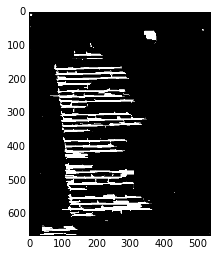

In [17]:
plt.imshow(rast1,cmap='gray')

In [ ]:
from skimage import morphology
rast1 = np.logical_not(skimage.morphology.remove_small_objects(np.logical_not(t), min_size=500, connectivity=4, in_place=False))
# rast1 = skimage.morphology.binary_dilation(rast1, selem = skimage.morphology.disk(15))
rast1 = skimage.morphology.binary_opening(rast1, selem = skimage.morphology.rectangle(9, 3)) #erosion
plt.imshow(rast1, cmap = 'gray')

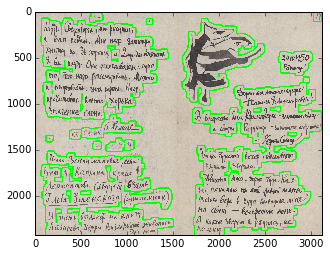

In [337]:
edges = skimage.morphology.binary_dilation(rast1, selem = skimage.morphology.disk(15)) - rast1 
outim = im.copy()
outim[edges == 1] = np.array((0, 255, 0))
plt.imshow(outim)

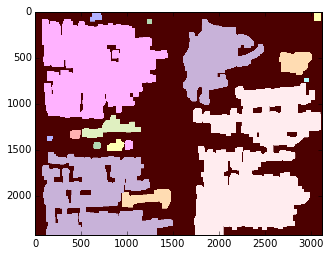

In [341]:
from scipy.ndimage.measurements import label
label_im, nb_labels = label(rast1.astype(int))
from skimage.color import label2rgb
image_label_overlay = label2rgb(label_im, image=rast1)
plt.imshow(image_label_overlay)

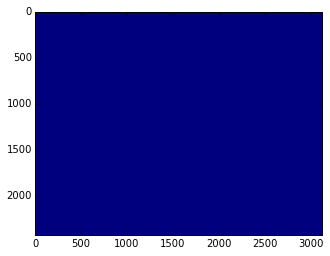

In [343]:
from skimage.morphology import convex_hull_image
#class scipy.spatial.ConvexHull(points, incremental=False, qhull_options=None)
#Convex hulls in N dimensions.
for i in range(nb_labels):
    imi = np.zeros(grim.shape)
    imi[rast1 == i] = grim[rast1 == i]
    imi = imi.asty pe(bool)
    chull = convex_hull_image(imi)
    plt.imshow(chull)
    del imi
    break

In [12]:
"""
COUNT HOGS AND CANNY
"""
from skimage import filters
from skimage import feature
def counthog(imgrad):
    return np.histogram(imgrad, bins = 8, density = True)[0]

In [91]:
"""
EXTRACT FEATURES
"""
def extract_features(forwardsupergrim, segments_slic, grim):
    feats_shape = 256*3+2+8+1+1
    imgrad = np.arctan2(filters.sobel_h(grim), filters.sobel_v(grim))
    edges = feature.canny(grim, sigma=1.0, low_threshold=None, high_threshold=None, mask=None)
    feats = np.zeros((forwardsupergrim.size, feats_shape))
    from skimage.util.shape import view_as_windows
    from skimage import exposure
    from skimage import color
    for i in range(forwardsupergrim.size):
#         patch_shape = (16, 16)
        wh = np.where(segments_slic == forwardsupergrim[i])
    #     x1 = wh[0].max()
    #     y1 = wh[1].max()
    #     x0 = wh[0].min()
    #     y0 = wh[0].min()
    #     patches1 = view_as_windows(grim[wh].reshape(-1,1), (16,1))#grim[x0:x1, y0:y1].reshape((x1-x0, y1-y0)), patch_shape)
    #     patches1 = patches1.reshape(-1, 16*1)#patch_shape[0]*patch_shape[1])#[::8]
    #     feats = np.zeros((patches1.shape[0], len(kernels)*2), dtype=np.double)
    #     for j in range(patches1.shape[0]):
    #         print(patches1.shape)
    #         feats[j] = compute_feats(patches1[j], kernels)
        hsvim = color.rgb2hsv(im[wh].reshape((-1, 1, 3)))
        feats[i, :256*3] = np.concatenate((exposure.histogram(hsvim[:,:,0])[0], exposure.histogram(hsvim[:,:,1])[0], 
                                   exposure.histogram(hsvim[:,:,2])[0]))
        feats[i, -12:-10] = np.array(wh[0].mean(), wh[1].mean())
        feats[i, -10:-2] = counthog(imgrad[wh])
        feats[i, -2] = np.sum(edges[wh])/wh[0].size
        feats[i, -1] = np.sum(segments_slic[wh])
#         neighborh = findneigh(forwardsupergrim, segments_slic, 2, feats_shape)
#         feats = np.concatenate((feats, neighborh), axis = 1)
    return feats

In [ ]:
neighborh = findneigh(forwardsupergrim, segments_slic, 2)

In [261]:
feats0 = np.concatenate((feats, neighborh), axis = 1)
feats0.shape

(256, 4)

In [262]:
from sklearn.cluster import DBSCAN
cl = DBSCAN(eps=0.5, min_samples=5, metric='euclidean', algorithm='auto', leaf_size=30, p=None, random_state=None)
clast = cl.fit_predict(feats0)

In [ ]:
clast = KMeans(5).fit_predict(feats0)
clast

In [ ]:
from skimage.morphology import convex_hull_image
#class scipy.spatial.ConvexHull(points, incremental=False, qhull_options=None)
#Convex hulls in N dimensions.
for i in clast:
    imi = np.zeros(grim.shape)
    imi[im0 == clast[i]*50] = grim[im0 == clast[i]*50]
    imi = imi.astype(bool)
    chull = convex_hull_image(imi)
    plt.imshow(chull)
    del imi
    break

In [265]:
im0 = np.ones(img[:,:,0].shape)
for i in range((forwardsupergrim.size)):
    im0[segments_slic == forwardsupergrim[i]] = clast[i]*50

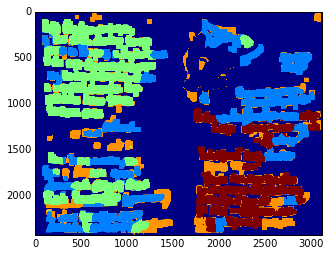

In [231]:
plt.imshow(im0)

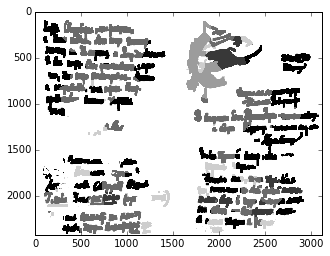

In [81]:
plt.imshow(im0)

In [ ]:
from skimage import filter
image = grim
for i in supergrim[supergrim[i]!=255]:
    filt_real, filt_imag = filter.gabor_filter(image, frequency=0.6)   
filt_real.shape
# plt.imshow(filt_real, cmap = 'gray')  

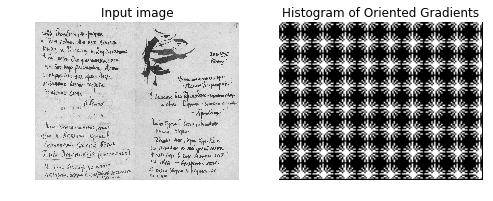

In [45]:
# (optional) global image normalisation
# computing the gradient image in x and y
# computing gradient histograms
# normalising across blocks
# flattening into a feature vector
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, color, exposure

fd, hog_image = hog(grim, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.axis('off')
ax1.imshow(grim, cmap=plt.cm.gray)
ax1.set_title('Input image')
# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

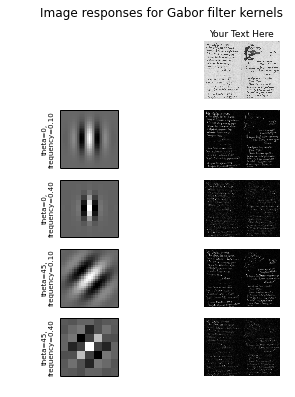

In [54]:
def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(nd.convolve(image, np.real(kernel), mode='wrap')**2 +
                   nd.convolve(image, np.imag(kernel), mode='wrap')**2)

# Plot a selection of the filter bank kernels and their responses.
results = []
images = [grim, ]
kernel_params = []
for theta in (0, 1):
    theta = theta / 4. * np.pi
    for frequency in (0.1, 0.4):
        kernel = gabor_kernel(frequency, theta=theta)
        params = 'theta=%d,\nfrequency=%.2f' % (theta * 180 / np.pi, frequency)
        kernel_params.append(params)
        # Save kernel and the power image for each image
        results.append((kernel, [power(img, kernel) for img in images]))

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(5, 6))
plt.gray()

fig.suptitle('Image responses for Gabor filter kernels', fontsize=12)

axes[0][0].axis('off')

image_names = ["Your Text Here",]
# Plot original images
for label, img, ax in zip(image_names, images, axes[0][1:]):
    ax.imshow(img)
    ax.set_title(label, fontsize=9)
    ax.axis('off')

for label, (kernel, powers), ax_row in zip(kernel_params, results, axes[1:]):
    # Plot Gabor kernel
    ax = ax_row[0]
    ax.imshow(np.real(kernel), interpolation='nearest')
    ax.set_ylabel(label, fontsize=7)
    ax.set_xticks([])
    ax.set_yticks([])

    # Plot Gabor responses with the contrast normalized for each filter
    vmin = np.min(powers)
    vmax = np.max(powers)
    for patch, ax in zip(powers, ax_row[1:]):
        ax.imshow(patch, vmin=vmin, vmax=vmax)
        ax.axis('off')

plt.show()

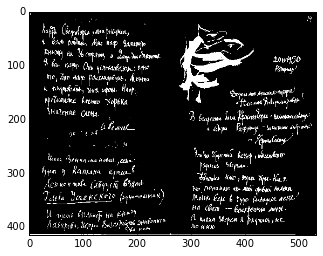

In [95]:
from sklearn.cluster import KMeans
binim = KMeans(2).fit_predict(grim.reshape((-1, 1))).reshape((grim.shape))
plt.imshow(binim, cmap = 'gray')

In [14]:

def func0(img):
    import cv2
    import numpy as np
    from matplotlib import pyplot as plt
    import sys
    import math
    import pdb
    import random as ra
    import json
    import csv

    ### convenience plotting functions
    def ss(thing):
      cv2.imwrite("about/%s.tif" % (ra.random()), thing)
      plt.subplot(121),plt.imshow(thing,cmap = 'gray')
      plt.show()

    def dd(thing, square):
      extra = thing.copy()
      cv2.drawContours(extra, [square], -1, (0,255,60), 3)
      ss(extra)
    ###

    # # Loading image
    # if len(sys.argv) == 2:
    #   filename = sys.argv[1] # for drawing purposes
    # else:
    #   print "No input image given! \n"

#     img = cv2.imread("../Images/9.tif",)
    img_copy = img.copy()[:,:,::-1] # color channel plotting mess http://stackoverflow.com/a/15074748/2256243
    height = img.shape[0]
    width = img.shape[1]

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) # matrix of ones

    # https://code.google.com/p/pythonxy/source/browse/src/python/OpenCV/DOC/samples/python2/squares.py?spec=svn.xy-27.cd6bf12fae7ae496d581794b32fd9ac75b4eb366&repo=xy-27&r=cd6bf12fae7ae496d581794b32fd9ac75b4eb366
    def angle_cos(p0, p1, p2):
        d1, d2 = (p0-p1).astype('float'), (p2-p1).astype('float')
        return abs( np.dot(d1, d2) / np.sqrt( np.dot(d1, d1)*np.dot(d2, d2) ) )

    squares = []
    all_contours = []

    for gray in cv2.split(img):
      dilated = cv2.dilate(src = gray, kernel = kernel, anchor = (-1,-1))

      blured = cv2.medianBlur(dilated, 7)

      # Shrinking followed by expanding can be used for removing isolated noise pixels
      # another way to think of it is "enlarging the background"
      # http://www.cs.umb.edu/~marc/cs675/cvs09-12.pdf
      small = cv2.pyrDown(blured, dstsize = (width // 2, height // 2))
      oversized = cv2.pyrUp(small, dstsize = (width, height))
      # after seeing utility of later thresholds (non 0 threshold results)
      # try instead to loop through and change thresholds in the canny filter
      # also might be interesting to store the contours in different arrays for display to color them according
      # to the channel that they came from
      for thrs in range(0, 255, 26):
        if thrs == 0:
          edges = cv2.Canny(oversized, threshold1 = 0, threshold2 = 50, apertureSize = 3)
          next0 = cv2.dilate(src = edges, kernel = kernel, anchor = (-1,-1))
        else:
          retval, next0 = cv2.threshold(gray, thrs, 255, cv2.THRESH_BINARY)

        tmp = cv2.findContours(next0, mode = cv2.RETR_LIST, method = cv2.CHAIN_APPROX_SIMPLE)
        hierarchy = tmp[0]
        contours = tmp[1]
        # how are the contours sorted? outwards to inwards? would be interesting to do a PVE
        # sort of thing where the contours within a contour (and maybe see an elbow plot of some sort)
        for cnt in contours:
          all_contours.append(cnt)
          cnt_len = cv2.arcLength(cnt, True)
          cnt = cv2.approxPolyDP(cnt, 0.02*cnt_len, True)
          if len(cnt) == 4 and cv2.contourArea(cnt) > 1000 and cv2.isContourConvex(cnt):
            cnt = cnt.reshape(-1, 2)
            max_cos = np.max([angle_cos( cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4] ) for i in range(4)])
            if max_cos < 0.1:
              squares.append(cnt)

    # ranking of shapes
    def rank(square):
      formatted = np.array([[s] for s in square], np.int32)
      x,y,wid,hei = cv2.boundingRect(formatted)
      max_distance_from_center = math.sqrt(((width / 2))**2 + ((height / 2))**2)
      distance_from_center = math.sqrt(((x + wid / 2) - (width / 2))**2 + ((y + hei / 2) - (height / 2))**2)

      height_above_horizontal = (height / 2) - y if y + hei > height / 2 else hei
      width_left_vertical = (width / 2) - x if x + wid > width / 2 else wid
      horizontal_score = abs(float(height_above_horizontal) / hei - 0.5) * 2
      vertical_score = abs(float(width_left_vertical) / wid - 0.5) * 2

      if cv2.contourArea(formatted) / (width * height) > 0.98:
        return 5 # max rank possible otherwise - penalize boxes that are the whole image heavily
      else:
        bounding_box = np.array([[[x,y]], [[x,y+hei]], [[x+wid,y+hei]], [[x+wid,y]]], dtype = np.int32)
        # every separate line in this addition has a max of 1
#         k = cv2.contourArea(formatted) / (width * height)
        k= (distance_from_center / max_distance_from_center +
          cv2.contourArea(formatted) / cv2.contourArea(bounding_box) +
          cv2.contourArea(formatted) / (width * height) +
          horizontal_score +
          vertical_score)
        return k

    sorted_squares = sorted(squares, key=lambda square: rank(square))

    img_with_squares = img_copy.copy()
    cv2.drawContours(img_with_squares, squares, -1, (0,255,60), 3)
    # plt.subplot2grid((2,5), (1,3)),plt.imshow(img_with_squares)
    # plt.title('All Rectangles'), plt.xticks([]), plt.yticks([])

    img_with_top_square = img_copy.copy()
    cv2.drawContours(img_with_top_square, [sorted_squares[0]], -1, (0,255,60), 3)
#     cv2.drawContours(img_with_top_square, [sorted_squares[1]], -1, (0,60,255), 3)
#     cv2.drawContours(img_with_top_square, [sorted_squares[2]], -1, (255,0,60), 3)

    # plt.subplot2grid((2,5), (1,4)),plt.imshow(img_with_top_square)
    # plt.title('Top Ranked Shape'), plt.xticks([]), plt.yticks([])
#     img_with_top_square2 = img_copy.copy()
#     mask_image(img_with_top_square2, sorted_squares[0])
    return sorted_squares[0]#img_with_top_square#img_with_squares

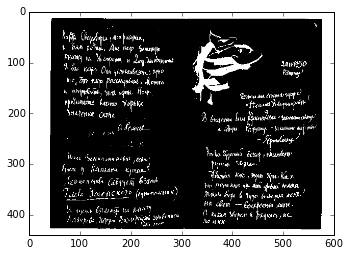

In [23]:
binim = np.logical_not(binim)
plt.imshow(binim, cmap = 'gray')

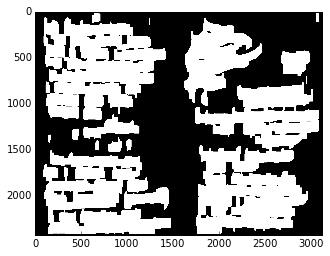

In [317]:
rast0 = binim
rast0 = skimage.morphology.binary_erosion(rast0, selem = skimage.morphology.rectangle(10, 50))
rast0 = skimage.morphology.binary_dilation(rast0, selem = skimage.morphology.rectangle(40, 10))
# rast1 = skimage.morphology.remove_small_objects(np.logical_not(rast0), min_size=2000, connectivity=4, in_place=False)

plt.imshow(rast0, cmap = 'gray')

/usr/local/lib/python3.4/dist-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


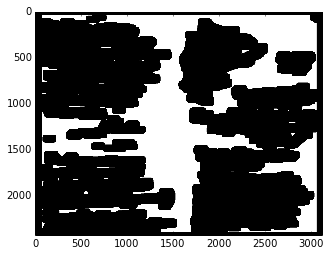

In [11]:
import skimage
from skimage import filters
from skimage import morphology
rast0 = binim
# import cv2
# kernel = skimage.morphology.disk(15)
# rast0 = cv2.morphologyEx(rast0,cv2.MORPH_GRADIENT,kernel, iterations = 2)
# rast0 = cv2.dilate(rast0, kernel, iterations = 3)
# rast0 = filters.gaussian_filter(rast0, sigma = 1)
rast0 = skimage.filters.median(rast0/rast0.max(), selem = skimage.morphology.disk(5))
rast0 = skimage.morphology.binary_erosion(rast0, selem = skimage.morphology.disk(4))

rast0 = skimage.morphology.binary_erosion(rast0, selem = skimage.morphology.rectangle(10, 50))
rast0 = skimage.morphology.binary_erosion(rast0, selem = skimage.morphology.rectangle(20, 7))
rast0 = skimage.morphology.binary_erosion(rast0, selem = skimage.morphology.disk(15))
rast0 = skimage.morphology.binary_erosion(rast0, selem = skimage.morphology.rectangle(10, 50))



# rast0 = skimage.morphology.binary_erosion(rast0, selem = skimage.morphology.rectangle(7, 15))

plt.imshow(rast0, cmap = 'gray')

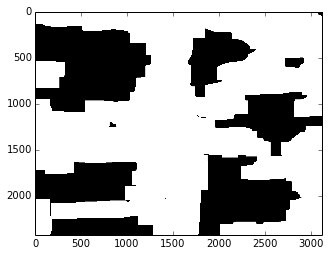

In [12]:
# rast0 = skimage.morphology.binary_erosion(rast0, selem = skimage.morphology.disk(5))
# rast0 = skimage.filters.median(rast0/rast0.max(), selem = skimage.morphology.rectangle(10, 5))
rast1 = rast0
# rast1 = skimage.morphology.binary_erosion(rast1, selem = skimage.morphology.disk(15))
# rast1 = skimage.morphology.remove_small_objects(rast1, min_size=2000, connectivity=4, in_place=False)
# rast1 = skimage.filters.median(rast1/rast1.max(), selem = skimage.morphology.rectangle(5, 15))
# rast1 = skimage.morphology.binary_dilation(rast1, selem = skimage.morphology.rectangle(10, 5))
# rast1 = skimage.morphology.binary_erosion(rast1, selem = skimage.morphology.rectangle(5, 50))
# rast1 = skimage.morphology.binary_erosion(rast1, selem = skimage.morphology.rectangle(5, 50))

rast1 = skimage.morphology.remove_small_objects(rast1, min_size=2000, connectivity=4, in_place=False)


rast1 = skimage.morphology.binary_dilation(rast1, selem = skimage.morphology.rectangle(50, 30))
rast1 = skimage.morphology.binary_dilation(rast1, selem = skimage.morphology.rectangle(40, 70))
# rast1 = skimage.morphology.binary_dilation(rast1, selem = skimage.morphology.rectangle(50, 70))


plt.imshow(rast1, cmap = 'gray')

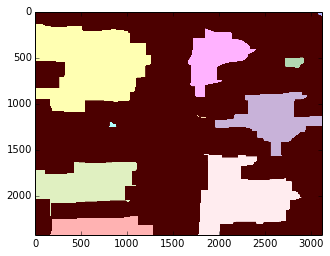

In [13]:
from scipy import ndimage
rast2 = np.logical_not(rast1)
# fill_coins = ndimage.binary_fill_holes(edges)
rast2 = skimage.morphology.remove_small_objects(rast2, min_size=1000, connectivity=4, in_place=False)
label_im, nb_labels = ndimage.measurements.label(rast2.astype(int))
from skimage.color import label2rgb
image_label_overlay = label2rgb(label_im, image=rast2)
plt.imshow(image_label_overlay)
# from skimage.segmentation import mark_boundaries
# plt.imshow(mark_boundaries(im, label_im, color = 1))

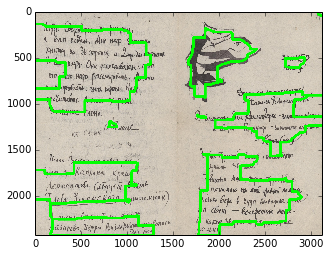

In [31]:
edges = skimage.morphology.binary_dilation(rast2, selem = skimage.morphology.disk(15)) - rast2 
outim = im.copy()
outim[edges == 1] = np.array((0, 255, 0))
plt.imshow(outim)
# from skimage.segmentation import mark_boundaries
# edges = mark_boundaries(im, label_im, color = 1)
# plt.imshow(skimage.filters.sobel(label_im))
#label_im
# edges = skimage.measure.find_contours(label_im, 0.5, fully_connected='low', positive_orientation='low')

In [8]:
# from planar import BoundingBox
# fit 
# indexes
# bbox = BoundingBox([label_im == 1], [label_im == 1][1])